In [32]:
#BLOCO 1: 
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd

#propriedades do problema
N = 50
minimum_global = -20
F = 0.8
C = 0.7
C1 = 1
C2 = 1
W = 0.7
vmax = 1


---
<h3> Rastrigin Function </h3>

In [33]:
def rastrigin(x):  # objective function
    x = x.reshape(1, -1).T
    Q = np.eye(len(x))
    X = Q.dot(x)

    n = len(X)
    F = 0
    
    for i in range(n):
        F = F + X[i]**2 - 10*np.cos(2*np.pi*X[i])
    
    return F[0]

C:\Users\VANDOD~1\AppData\Local\Temp/ipykernel_12724/3156458275.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


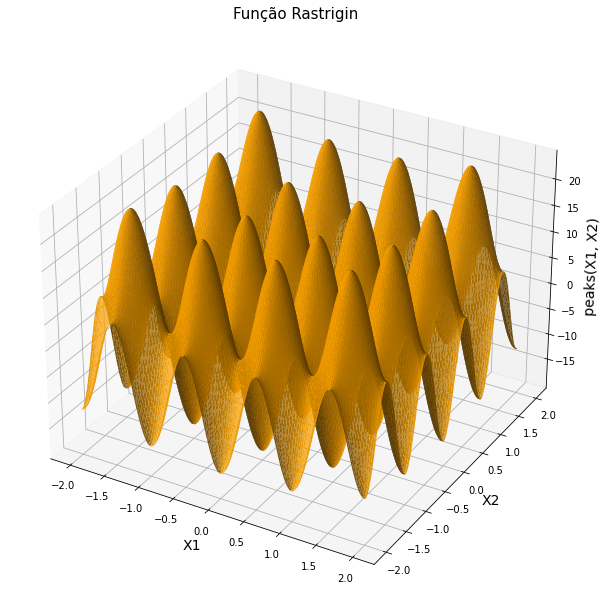

In [34]:
x1 = x2 = np.linspace(-2, 2, 150)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função Rastrigin', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [rastrigin(x_) for x_ in x_p], linewidth=0.1, color='orange')
plt.show()

---
# IMPLEMENTAÇÃO


In [35]:
# BLOCO 2: GERANDO A POPULAÇÃO INICIAL
def initPop(pop, velocidades):

    for c in range(0,N):                                                        # laço para gerar os N indivíduos e suas velocidades
        individuo = []                                                              # lista auxiliar para gerar 1 elemento indivíduo
        velocidade = []                                                             # lista auxiliar para gerar 1 elemento velocidade
        individuo.append(float("{:.4f}".format(rd.uniform(-2,2))))                  # gera a coordenada x1 pro individuo
        individuo.append(float("{:.4f}".format(rd.uniform(-2,2))))                  # gera a coordenada x2 pro individuo
        velocidade.append(float("{:.2f}".format(rd.uniform(-vmax,vmax))))           # gera a velocidade v2 pro individuo
        velocidade.append(float("{:.2f}".format(rd.uniform(-vmax,vmax))))           # gera a velocidade v2 pro individuo
        pop.append(individuo[:])                                                    # adiciona o individuo na população
        velocidades.append(velocidade[:])
        

In [36]:
# BLOCO 3: TESTANDO A FUNÇÃO ACIMA
pop_teste = []
velocidades_teste = []
initPop(pop_teste, velocidades_teste)
print(f'população teste: {pop_teste}\n')
print(f'vetor velocidade: {velocidades_teste}')

população teste: [[1.6195, -0.1037], [0.7686, 0.8508], [-0.6896, -0.1794], [1.8327, -0.9761], [-1.4086, -1.3323], [1.4434, 1.26], [1.4413, 1.3367], [0.2693, -1.1503], [-1.0763, 1.2173], [1.5558, -0.3299], [0.3937, 1.6066], [1.8157, 0.0546], [-1.0489, 0.4317], [-1.5049, -1.3952], [1.6577, -1.9586], [-0.018, 0.4569], [0.3051, -0.2009], [-0.5254, -1.2408], [0.8679, 0.5956], [-1.9896, -1.5409], [-0.6798, 0.902], [-0.3782, 1.9689], [0.9253, 0.532], [1.6969, 0.7064], [-0.4179, -1.8473], [-1.8404, 0.93], [-1.9375, 1.8761], [-1.2144, 1.4094], [1.0546, 0.9185], [-1.5813, -1.7943], [-0.0282, -0.8174], [-0.7822, -1.6563], [1.1728, -1.5407], [0.3268, -1.353], [0.6069, -1.2642], [1.1454, -0.5769], [1.7507, -1.4971], [0.4112, 1.5469], [0.3444, 1.1304], [1.9763, -0.9634], [-0.189, 0.6187], [-1.5221, 0.8259], [1.1368, -0.6871], [0.3194, 1.5297], [1.7171, 1.147], [-1.4565, -1.7205], [-0.2331, -0.1154], [0.9946, 1.4695], [0.6356, 1.0477], [1.4913, -0.4334]]

vetor velocidade: [[-0.85, -0.43], [0.76, -0.

In [37]:
#BLOCO 4: CALCULANDO O F_DE_X DE UM INDIVIDUO
def calcula_f_de_x(individuo):                
    ar = np.array(individuo)                                    #converte a lista individuo para array
    return float("{:.4f}".format(rastrigin(ar)))                #calcula o f(x) do individuo apartir da função rastringin

In [38]:
# BLOCO 5: TESTANDO A FUNÇÃO ACIMA
f_de_x_teste = calcula_f_de_x(pop_teste[0])
print(f_de_x_teste)

1.9933


In [39]:
# BLOCO 6: GERANDO LISTA DE POP_FITNESS DA POPULAÇÃO
def popfitness(pop):
    pop_fitness = []                                                                #cria uma lista para armazenar o fitness da população   
    for c in range(0,N):                                                            #laço para analisar os N individuos
        fitness_ind = calcula_f_de_x(pop[c])                                            #calcula o fitness de cada individuo
        pop_fitness.append(fitness_ind)                                                 #coloca o fitness na lista
    return pop_fitness

In [40]:
# BLOCO 7: TESTANDO A FUNÇÃO ACIMA
pop_fitness = popfitness(pop_teste)
print(pop_fitness)

[1.9933, -5.7699, -0.0795, -10.5414, 17.0987, 13.6732, 18.3737, -3.2572, -8.2726, 16.733, 18.4269, -10.1293, 0.8481, 22.1158, 2.4002, -0.0915, 0.4904, 11.1108, 2.6089, 6.0258, -2.6185, 1.4217, 2.0191, 9.3586, 6.5461, -10.1758, -9.0849, 9.666, -16.1787, 11.6958, -13.2839, 6.8988, 8.7614, 12.6071, 10.6854, 4.3908, 15.2606, 20.6144, 0.1589, -14.7922, 4.0243, 8.3124, -0.9134, 16.492, 0.2872, 16.5533, -8.4767, 2.9714, -1.4678, 21.534]


In [41]:
#BLOCO 8: CALCULANDO A NOVA POSIÇÃO DO INDIVÍDUO
def movimentacao(individuo, velocidade):
    individuo[0] = individuo[0] + velocidade[0]                 #calcula a posição final do individuo na coordenada x1
    individuo[1] = individuo[1] + velocidade[1]                 #calcula a posição final do individuo na coordenada x2
    for c in range(0,2):                                        #laço para analisar as suas coordenadas do individuo
        if individuo[c] > 2:                                        #confere se houve um extrapolamento positivo da coordenada 
            reflexao = individuo[c] - 2                                 #em caso positivo, calcula a reflexão 
            individuo[c] = 2 - reflexao                                 #aplica a reflexão
        if individuo[c] < -2:                                       #confere se houve um extrapolamento negativo da coordenada
            reflexao = (individuo[c] + 2)                               #em caso positivo, calcula a reflexão
            individuo[c] = -2 - reflexao                                #aplica a reflexão

    

In [42]:
# BLOCO 9: TESTANDO A FUNÇÃO ACIMA

#COM REFLEXÃO:
pos_teste = [1.9, -1.4]
velocidade_teste  = [1, -0.7]
print(f'Posição inicial: {pos_teste} | Velocidade: {velocidade_teste}')
movimentacao(pos_teste, velocidade_teste)
print(f'Posição final: {pos_teste}')
print('-'*20)

#SEM REFLEXAO:
pos_teste = [1, -0.5]
velocidade_teste  = [0.5, -0.7]
print(f'Posição inicial: {pos_teste} | Velocidade: {velocidade_teste}')
movimentacao(pos_teste, velocidade_teste)
print(f'Posição final: {pos_teste}')


Posição inicial: [1.9, -1.4] | Velocidade: [1, -0.7]
Posição final: [1.1, -1.9000000000000004]
--------------------
Posição inicial: [1, -0.5] | Velocidade: [0.5, -0.7]
Posição final: [1.5, -1.2]


In [43]:
#BLOCO 10: ATUALIZANDO O W 
def atualizaW(t):
    w = 0.7 - ((0.7-0.3)/50)*t                              # formula para atualizar o W
    
    if w > 0.7:                                             #se passar do valor maximo, W vira 0.7
        w = 0.7
    
    elif w< 0.3:                                            #se passar do valor minimo, W vira 0.3
        w = 0.3
    
    return w



In [44]:
# BLOCO 11: FUNÇÃO GRÁFICA 
def grafico(pop, t):

    fig, ax = plt.subplots()                                                                                                        #cria o gráfico vázio

    min = [0, 0]                                                                                                           #define a coordenada que contém o minimo

    curves = ax.tricontour(x_p[:, 0], x_p[:, 1], [rastrigin(x_) for x_ in x_p])                                                         #plota as curvas de nivel da superficie no gráfico
    plt.scatter(min[0], min[1], color='red', s = 100)                                                                               #plota o minimo no gráfico com a cor vermelha
    for c in range(0,N):                                                                                                            #laço para plotar os 50 individuos
        plt.scatter(pop[c][0],pop[c][1], color='blue')                                                                                  #plota um individuo no gráfico com a cor azul

    plt.xlim((-2,2))                                                                                                                #define os limites da coordenada x1 no gráfico
    plt.ylim((-2,2))                                                                                                                #define os limites da coordenada x2 no gráfico

    ax.set_title(f'Geração {t}', fontdict={'fontsize':15})                                                                          #nomeia o gráfico
    ax.set_xlabel('X1', fontdict=font_labels)                                                                                       #nomeia o eixo x
    ax.set_ylabel('X2', fontdict=font_labels)                                                                                       #nomeia o eixo y
    plt.show()                                                                                                                      #mostra o gráfico


Melhor indivíduo inicial: [0.191, 0.1135]; Minímo da população: -11.1365


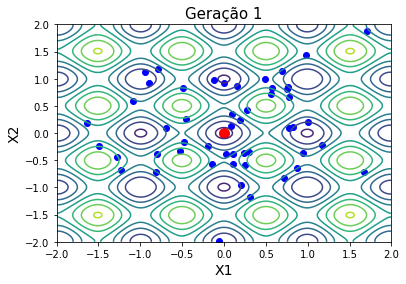

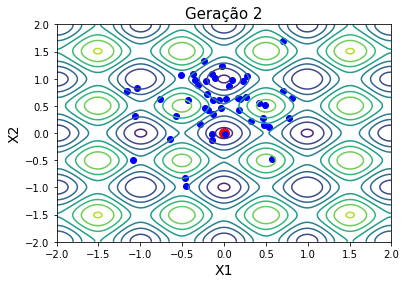

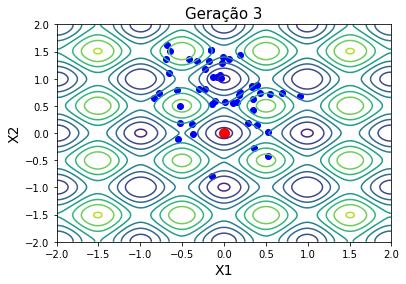

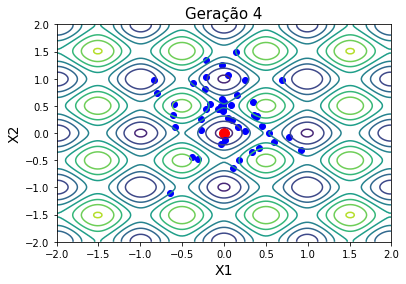

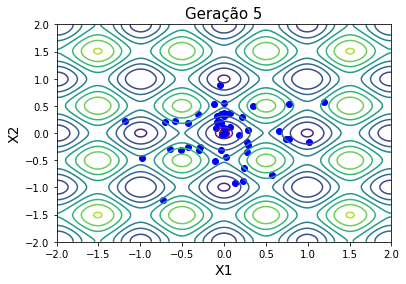

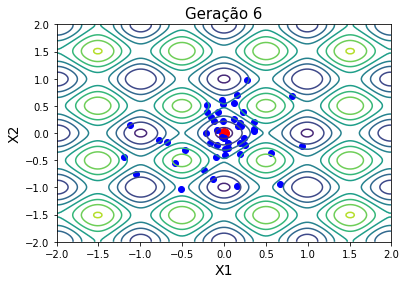

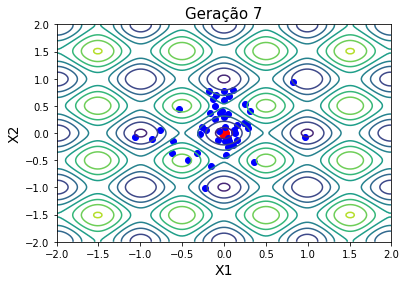

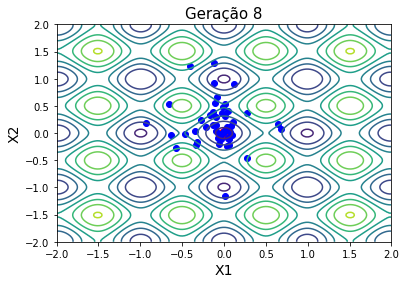

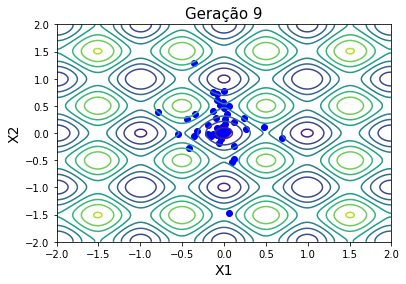

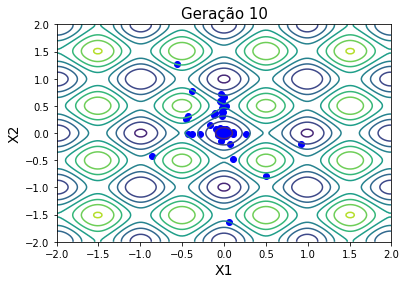

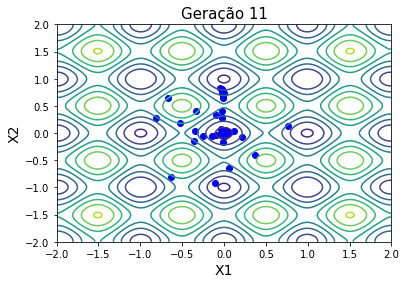

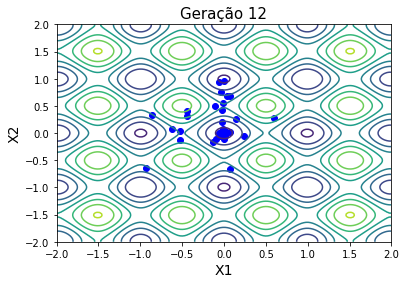

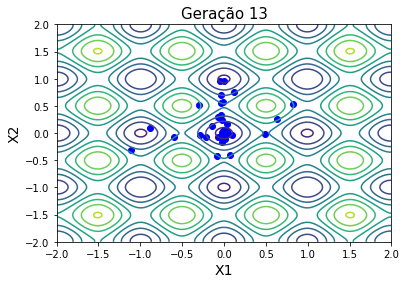

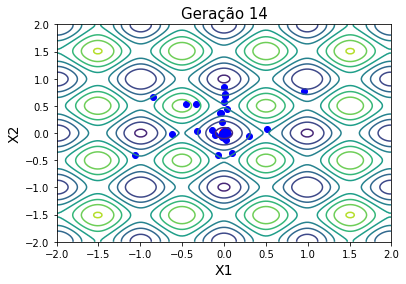

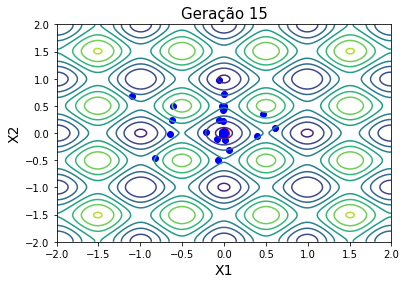

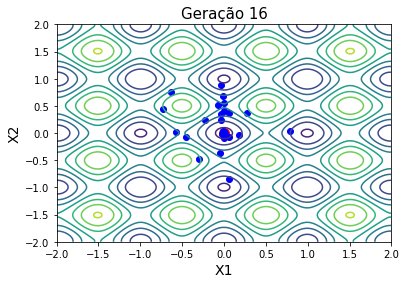

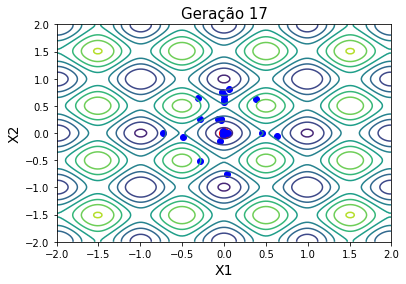

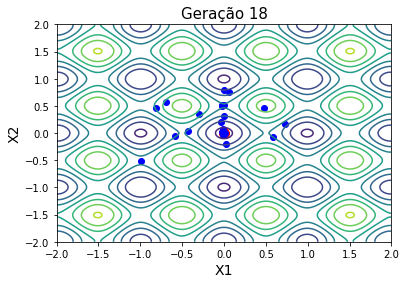

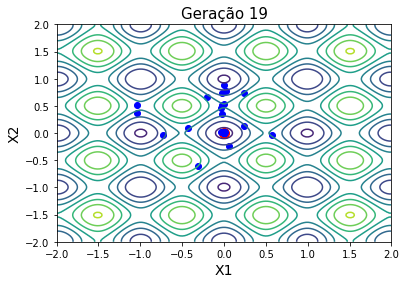

GERAÇAO FINAL:  20
Posição do melhor indivíduo final: [0.001, -0.0]
Minímo da população: -20.0 

Valor de W ao longo das gerações: [0.7, 0.6733333333333333, 0.6466666666666666, 0.62, 0.5933333333333333, 0.5666666666666667, 0.54, 0.5133333333333333, 0.48666666666666664, 0.45999999999999996, 0.4333333333333333, 0.4066666666666666, 0.38, 0.35333333333333333, 0.32666666666666666, 0.3, 0.3, 0.3, 0.3]


In [45]:
#BLOCO 12: BLOCO PRINCIPAL

## inicialização da população
Ws = []                                                                                                 #lista para armazenar os W ao longo das gerações
pop = []                                                                                                #lista para armazenar a população 
velocidades = []                                                                                        #lista para armazenar as velocidades
pbest = []                                                                                              #lista para armazenar a melhor posição de cada particula
minimos = []                                                                                            #lista para armazenar o melhor f(x) de cada particula
pg = []                                                                                                 #lista para armazenar a melhor posição já encontrada

initPop(pop, velocidades)                                                                               #cria a população e as velocidades iniciais
pop_fitness = popfitness(pop)                                                                           #analisa o fitness da população
best = min(pop_fitness)                                                                                 #descobre o melhor f(x) da população inicial
pos_best = pop_fitness.index(best)                                                                      #descobre a posição do melhor individuo

pbest = pop[:]                                                                                          #preenche 'pbest' na geração inicial
minimos = pop_fitness[:]                                                                                #preenche 'minimos' na geração inicial

pg = (pop[pos_best])                                                                                    #preenche o pg na geração inicial
t = 1                                                                                                   #contador de gerações                          

print(f'Melhor indivíduo inicial: {pg}; Minímo da população: {best}')

while best != minimum_global and t!=50:                                                                           #laço até encontrar a solução perfeita
                                                                                                 
    for c in range(0,N):                                                                                #laço que percorre todos os indivíduos
        if(calcula_f_de_x(pop[c]) < minimos[c]):                                                            #compara o f(x) de cada individuo da população atual com os da lista minimos
            minimos[c] = calcula_f_de_x(pop[c])                                                                 #caso, o individuo da população atual seja melhor, atualiza minimos
            pbest[c] = pop[c]                                                                                   #também salva a posição dele em pbest
        best = min(minimos)                                                                                 #descobre o melhor f(x) da geração
        pos_best = minimos.index(best)                                                                      #descobre a posição do melhor individuo
        pg = pbest[pos_best]                                                                                #atualiza pg
        
        individuo = []
        individuo.append(pop[c][0])              
        individuo.append(pop[c][1])                                                                         #lista auxiliar para armazenar um individuo da população
        for d in range(0,2):                                                                                #laço para ambas dimensoes do problema
            P1 = rd.random()
            P2 = rd.random()
            t1 = P1*C1
            t2 = P2*C2
            vel = W*velocidades[c][d] + t1*(pbest[c][d] - individuo[d]) + t2*(pg[d] - individuo[d])                 #calcula uma coordenada do vetor velocidade do individuo
            if(vel>vmax):                                                                                           #confere se a velocidade eh maior do que a permitida no problema
                vel = vmax                                                                                                  #altera a velocidade para o valor máximo, caso positivo
            elif(vel<-vmax):                                                                                        #confere se a velocidade eh menor do que a permitida no problema
                vel = -vmax                                                                                                 #altera a velocidade para o valor minimo, caso positivo
            velocidades[c][d] = vel                                                                                 #atualiza uma coordenada do vetor velocidade do individuo
        
        movimentacao(individuo, velocidades[c])                                                                     #movimenta o individuo
        pop[c] = individuo[:]                                                                                       #atualiza a população

    Ws.append(W)                                                                                                    #armazena o valor de W
    W = atualizaW(t)                                                                                                #muda o valor de W para a próxima geração
    grafico(pop, t)
    t = t + 1                                                                                               #incrementa a geração 
    
                                                                                                                                          
#formatando os valores finais                                          
pop[pos_best][0] = float("{:.3f}".format(pop[pos_best][0]))
pop[pos_best][1] = float("{:.3f}".format(pop[pos_best][1]))

print('GERAÇAO FINAL: ', t) 
print(f'Posição do melhor indivíduo final: [{pop[pos_best][0]}, {pop[pos_best][1]}]')
print(f'Minímo da população: {best} \n')
print(f'Valor de W ao longo das gerações: {Ws}')


# **RELATÓRIO EVOLUÇÃO DIFERENCIAL - FUNÇÃO RASTRINGIN**
### Aluno 1: Vando Carlos Diniz Reis - 2019057195 
### Aluno 2: Rafael Moura Marques - 2019089305
---
# *_IMPLEMENTAÇÃO_*: 

A implementação deste algoritmo foi igual a usada no código anterior. As únicas diferenças foram usar a função rastringin no lugar da função peaks para calcular o fitness de um indivíduo, e alterar o limite dos valores disponiveis de x1 e x2 para -2 a 2. 

# _*ANÁLISE DOS RESULTADOS*_: 

### <ins>Eficiência:</ins>

Para testarmos o funcionamento e a eficiência de um algoritmo PS0 na função Rastringin, decidimos simular o código 100 vezes para calcular o número médio de gerações que o algoritmo encontrava a solução desejada. No final, a média encontrada foi de aproximadamente 18 gerações.

<img src=rastringin.png alt="Peaks" width="700"/>

Notamos que em todas as simulações, o algoritmo encontrou a solução perfeita antes de bater o limite de gerações. Acreditamos que um dos motivos disso ter acontecido é a superfície gerada pelo terreno Peaks. Como ela tem pouquissimas depressões, a população sempre tende a encontrar a depressão que contém o minimo global e se deslocar para lá. Sem contar que as outras depressões não possuem um f(x) baixo o suficiente para enganar a população.

Reparamos também que este tipo de algoritmo é muito mais eficiente que o método de Evolução Diferencial. Ná prática passada vimos que o algortimo de Evolução Diferencial demorou em média 34 gerações para convergir para o ponto desejado na mesma superfície, um número bem superior que o atual. Acreditamos que isso aconteceu porque no PSO os indivíduos além de aprenderem com o passar das gerações, eles cooperam entre si, enquanto nos algoritmos DE as soluções candidatas competem entre si. Esse constante compartilhamento de informações faz com que o PSO seja mais eficiente que os algortimos genéticos em casos como esse.



